In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import umap
from matplotlib.colors import ListedColormap

In [15]:
# df = pd.read_excel('LPS experiment - za Vladu v07032024.xlsx', sheet_name='Exp2')

# df = pd.read_excel('LPS GL-II-73 Z-SCORE LITTER.xlsx', sheet_name='Z-score SICK. vs. SPT ')

# df = df[~df['Animal'].isin({26,28,31,32,34,38,44,48,77,80,82,99})]
# df

In [2]:
df = pd.read_excel('LPS_2024_jul_24.xlsx', sheet_name='Results (outl.excl;calc)')
df

,PCR sample,Animal,Sex,Treatment,"PreLPS treatment (I, III - I (SOL), II,IV - II (GL-II-73))","PostLPS treatment (I, II - I (SOL), III,IV - II (GL-II-73))",Series,Litter,SPTHAB1,SPTHAB2,...,LIHAB3,LIHB48,LIHB24,LIH24,LIH48,SLAHB48,SLAHB24,SLAH2,SLAH24,SLAH48
0,1,1,F,I,I,I,1,A,81.53,87.60,...,5.22,5.11,5.14,1.81,4.60,19.21,11.43,8.94,7.50,15.39
1,2,2,F,II,II,I,1,A,2.91,75.37,...,5.67,5.43,5.13,0.78,3.43,12.02,15.92,4.08,2.58,4.86
2,3,3,F,III,I,II,1,A,52.86,59.84,...,4.71,4.06,4.06,1.39,3.22,17.72,7.50,2.78,0.74,5.76
3,4,4,F,IV,II,II,1,A,79.82,54.12,...,4.74,4.69,4.24,0.80,2.68,7.92,16.44,4.38,0.11,1.20
4,5,5,F,III,I,II,1,A,75.76,87.34,...,4.79,4.98,5.68,1.21,4.07,8.04,7.20,0.32,1.89,6.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,93,93,M,III,I,II,4,D,60.87,93.75,...,5.00,4.85,4.99,0.32,4.54,15.36,16.54,3.34,2.00,1.65
81,94,94,M,IV,II,II,4,D,46.08,70.73,...,4.57,4.40,4.45,0.54,4.38,14.70,14.32,4.28,1.48,8.06
82,95,95,M,IV,II,II,4,D,79.52,85.71,...,4.74,4.61,4.56,0.75,5.19,19.67,16.77,1.76,0.21,1.92
83,96,96,M,I,I,I,4,D,68.25,93.12,...,5.99,5.77,6.05,0.47,5.36,15.19,18.78,4.03,2.27,1.69


In [3]:
df.columns

Index(['PCR sample', 'Animal', 'Sex', 'Treatment',
       'PreLPS treatment (I, III - I (SOL), II,IV - II (GL-II-73))',
       'PostLPS treatment (I, II - I (SOL), III,IV - II (GL-II-73))', 'Series',
       'Litter', 'SPTHAB1', 'SPTHAB2', 'SPTHAB3', 'SPTHB48', 'SPTHB24',
       'SPTH24', 'SPTH48', 'LISPTHAB1', 'LISPTHAB2', 'LISPTHAB3', 'LISPTHB48',
       'LISPTHB24', 'LISPTH24', 'LISPTH48', 'FSTH48', 'BWHB48', 'BWHB24',
       'BWH0', 'BWH24', 'BWH48', 'dBWHB48', 'dBWHB24', 'dBWH24', 'dBWH48',
       'FIHB48', 'FIHB24', 'FIH24', 'FIH48', 'LIHAB1', 'LIHAB2', 'LIHAB3',
       'LIHB48', 'LIHB24', 'LIH24', 'LIH48', 'SLAHB48', 'SLAHB24', 'SLAH2',
       'SLAH24', 'SLAH48'],
      dtype='object')

In [83]:
colors = ["#1f77b4", "#ff7f0e", "#279e68", "#d62728", "#aa40fc", "#8c564b", \
                  "#e377c2", "#b5bd61", "#17becf", "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", \
                  "#c5b0d5", "#c49c94", "#f7b6d2", "#dbdb8d", "#9edae5", "#ad494a", "#8c6d31", \
                  "#b4d2b1", "#568f8b", "#1d4a60", "#cd7e59", "#ddb247", "#d15252"]
custom_palette = sns.color_palette(colors)
# sns.set_palette(custom_palette)
                
custom_cmap = ListedColormap(colors)

<AxesSubplot:xlabel='Treatment', ylabel='SPTHAB1'>

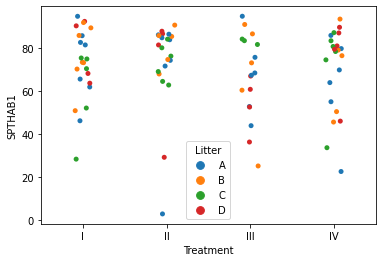

In [4]:
sns.stripplot(data=df, x='Treatment', y='SPTHAB1', hue='Litter')

In [10]:
for var in df.columns[-22:]:
    plt.figure(figsize=(26, 12))
        
    
    plt.legend([], [], frameon=False)
    bp = sns.boxplot(data=df, x='Treatment', y=var, hue='Litter', showfliers=False, color='gray')
    sns.swarmplot(data=df[df['Sex'] == 'M'], x='Treatment', y=var, hue='Litter', dodge=True, size=10, marker='^', hue_order=['A', 'B', 'C', 'D'])
    sns.swarmplot(data=df[df['Sex'] == 'F'], x='Treatment', y=var, hue='Litter', dodge=True, size=10, marker='o', hue_order=['A', 'B', 'C', 'D'])

    
    plt.savefig(var + '.jpg', dpi=150, bbox_inches='tight')
    plt.close()

In [32]:
# 1 razdvojeni sve
for treatment in df['Treatment'].unique():
    for sex in df['Sex'].unique():
        plt.figure(figsize=(20, 16))
        df_sub = df[(df['Treatment'] == treatment) & (df['Sex'] == sex)]
        df_sub = df_sub.loc[:, df.columns[-40:]]
        # plotting correlation heatmap 
        dataplot = sns.heatmap(df_sub.corr(), cmap="YlGnBu", annot=True, annot_kws={'size': 8}) 
        plt.title(f'{treatment} - {sex} - datapoints: {len(df_sub)}', size = 18)

#         plt.show()
        plt.savefig(treatment + '_' + '_' + sex + '.jpg', dpi=150, bbox_inches='tight')
        plt.close()  

In [33]:
# 2 spojen sex razdvojen tretman
for treatment in df['Treatment'].unique():
    plt.figure(figsize=(20, 16))
    df_sub = df[(df['Treatment'] == treatment)]
    df_sub = df_sub.loc[:, df.columns[-40:]]
    # plotting correlation heatmap 
    dataplot = sns.heatmap(df_sub.corr(), cmap="YlGnBu", annot=True, annot_kws={'size': 8}) 
    plt.title(f'{treatment} - datapoints: {len(df_sub)}', size = 18)

#             plt.show()
    plt.savefig(treatment + '_' + '_' + '.jpg', dpi=150, bbox_inches='tight')
    plt.close()

In [35]:
# 3 razdvojeni sex spojeni I i II i III i IV
for treatment in [{'I', 'II'}, {'III', 'IV'}]:
    for sex in df['Sex'].unique():
        plt.figure(figsize=(20, 16))
        df_sub = df[(df['Treatment'].isin(treatment)) & (df['Sex'] == sex)]
        df_sub = df_sub.loc[:, df.columns[-40:]]
        # plotting correlation heatmap 
        dataplot = sns.heatmap(df_sub.corr(), cmap="YlGnBu", annot=True, annot_kws={'size': 8}) 
        plt.title('_'.join(treatment) + f' - {sex} - datapoints: {len(df_sub)}', size = 18)

#             plt.show()
        plt.savefig('_'.join(treatment) + '_' + sex + '.jpg', dpi=150, bbox_inches='tight')
        plt.close()  

In [36]:
# 4 spojeni sex spojeni I i II i III i IV
for treatment in [{'I', 'II'}, {'III', 'IV'}]:
    plt.figure(figsize=(20, 16))
    df_sub = df[(df['Treatment'].isin(treatment))]
    df_sub = df_sub.loc[:, df.columns[-40:]]
    # plotting correlation heatmap 
    dataplot = sns.heatmap(df_sub.corr(), cmap="YlGnBu", annot=True, annot_kws={'size': 8}) 
    plt.title('_'.join(treatment) + f' - datapoints: {len(df_sub)}', size = 18)

    plt.savefig('_'.join(treatment) + '.jpg', dpi=150, bbox_inches='tight')
    plt.close() 

In [39]:
# 5 spojeni sex spojeni svi tretmani
for treatment in [{'I', 'II', 'III', 'IV'}]:
    plt.figure(figsize=(28, 18))
    df_sub = df[(df['Treatment'].isin(treatment))]
    df_sub = df_sub.loc[:, df.columns[-40:]]
    # plotting correlation heatmap 
    dataplot = sns.heatmap(df_sub.corr(), cmap="YlGnBu", annot=True, annot_kws={'size': 9}) 
    plt.title('_'.join(treatment) + f' - datapoints: {len(df_sub)}', size = 18)

    plt.savefig('_'.join(treatment) + '.jpg', dpi=150, bbox_inches='tight')
    plt.close() 

# UMAP

In [10]:
umap_df

,PCR sample,Animal,Sex,Treatment,"PreLPS treatment (I, III - I (SOL), II,IV - II (GL-II-73))","PostLPS treatment (I, II - I (SOL), III,IV - II (GL-II-73))",Series,Litter,SPTHAB1,SPTHAB2,...,LIHAB3,LIHB48,LIHB24,LIH24,LIH48,SLAHB48,SLAHB24,SLAH2,SLAH24,SLAH48
0,1,1,F,I,I,I,1,A,81.53,87.60,...,5.22,5.11,5.14,1.81,4.60,19.21,11.43,8.94,7.50,15.39
1,2,2,F,II,II,I,1,A,2.91,75.37,...,5.67,5.43,5.13,0.78,3.43,12.02,15.92,4.08,2.58,4.86
2,3,3,F,III,I,II,1,A,52.86,59.84,...,4.71,4.06,4.06,1.39,3.22,17.72,7.50,2.78,0.74,5.76
3,4,4,F,IV,II,II,1,A,79.82,54.12,...,4.74,4.69,4.24,0.80,2.68,7.92,16.44,4.38,0.11,1.20
4,5,5,F,III,I,II,1,A,75.76,87.34,...,4.79,4.98,5.68,1.21,4.07,8.04,7.20,0.32,1.89,6.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,93,93,M,III,I,II,4,D,60.87,93.75,...,5.00,4.85,4.99,0.32,4.54,15.36,16.54,3.34,2.00,1.65
81,94,94,M,IV,II,II,4,D,46.08,70.73,...,4.57,4.40,4.45,0.54,4.38,14.70,14.32,4.28,1.48,8.06
82,95,95,M,IV,II,II,4,D,79.52,85.71,...,4.74,4.61,4.56,0.75,5.19,19.67,16.77,1.76,0.21,1.92
83,96,96,M,I,I,I,4,D,68.25,93.12,...,5.99,5.77,6.05,0.47,5.36,15.19,18.78,4.03,2.27,1.69


In [14]:
umap_df

,SPTHAB1,SPTHAB2,SPTHAB3,SPTHB48,SPTHB24,SPTH24,SPTH48,LISPTHAB1,LISPTHAB2,LISPTHAB3,...,LIHAB3,LIHB48,LIHB24,LIH24,LIH48,SLAHB48,SLAHB24,SLAH2,SLAH24,SLAH48
0,81.53,87.60,95.04,94.96,97.30,74.14,15.88,1.57,1.29,1.21,...,5.22,5.11,5.14,1.81,4.60,19.21,11.43,8.94,7.50,15.39
1,2.91,75.37,85.82,87.11,92.35,18.37,92.89,3.78,1.34,1.34,...,5.67,5.43,5.13,0.78,3.43,12.02,15.92,4.08,2.58,4.86
2,52.86,59.84,81.48,96.62,92.64,77.50,89.62,0.70,1.27,1.35,...,4.71,4.06,4.06,1.39,3.22,17.72,7.50,2.78,0.74,5.76
3,79.82,54.12,97.14,28.80,90.58,9.76,80.42,1.14,0.85,1.05,...,4.74,4.69,4.24,0.80,2.68,7.92,16.44,4.38,0.11,1.20
4,75.76,87.34,87.06,73.91,30.25,40.00,39.02,1.32,0.79,0.85,...,4.79,4.98,5.68,1.21,4.07,8.04,7.20,0.32,1.89,6.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,60.87,93.75,92.50,78.82,57.96,57.14,76.19,1.38,1.76,1.60,...,5.00,4.85,4.99,0.32,4.54,15.36,16.54,3.34,2.00,1.65
81,46.08,70.73,92.86,90.56,88.83,27.78,71.17,1.02,1.23,1.40,...,4.57,4.40,4.45,0.54,4.38,14.70,14.32,4.28,1.48,8.06
82,79.52,85.71,90.77,82.86,62.07,60.38,98.10,1.66,1.40,1.30,...,4.74,4.61,4.56,0.75,5.19,19.67,16.77,1.76,0.21,1.92
83,68.25,93.12,95.08,96.90,92.48,64.52,72.92,2.11,1.89,1.83,...,5.99,5.77,6.05,0.47,5.36,15.19,18.78,4.03,2.27,1.69


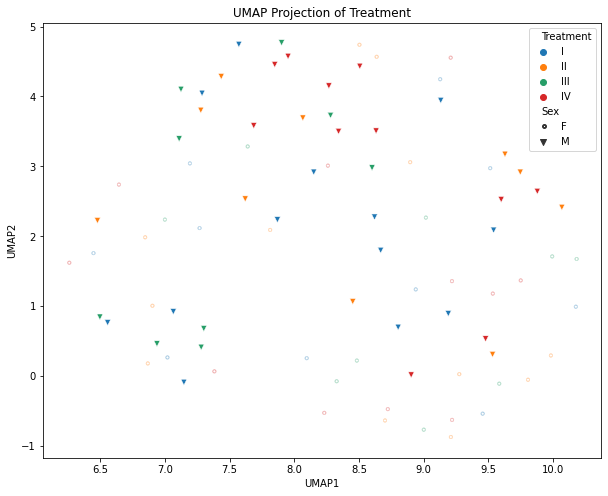

In [85]:
umap_input_df = df.loc[:, df.columns[8:]]
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)

# Fit and transform the data
umap_projection = umap_model.fit_transform(umap_input_df)

# Convert the projection to a DataFrame for easier plotting
umap_df = pd.DataFrame(umap_projection, columns=['UMAP1', 'UMAP2'])
for col in df.columns[1:8]:  
    umap_df[col] = df[col]
markers = {'M': 'v', 'F': "$\circ$"}
    
# Plot using seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP1', y='UMAP2', data=umap_df, hue='Treatment', style='Sex', markers=markers, 
                palette=dict(zip(umap_df['Treatment'].unique(), colors)))
plt.title('UMAP Projection of Treatment')
plt.savefig('umap_treatment.jpg', dpi=150, bbox_inches='tight')
plt.show()

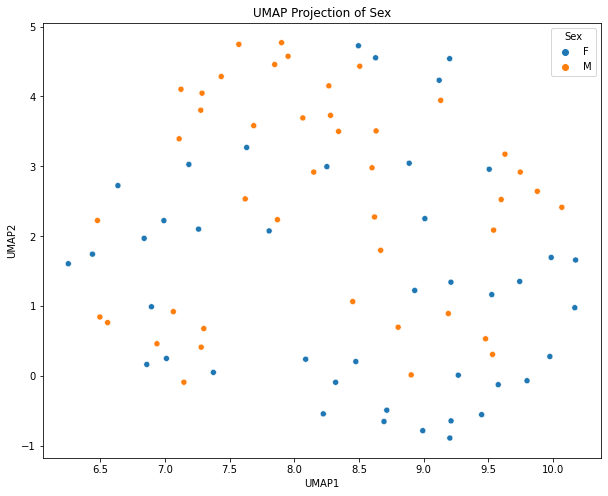

In [87]:
# Plot using seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP1', y='UMAP2', data=umap_df, hue='Sex', markers=markers, 
                palette=dict(zip(umap_df['Sex'].unique(), colors)))
plt.title('UMAP Projection of Sex')
plt.savefig('umap_sex.jpg', dpi=150, bbox_inches='tight')
plt.show()

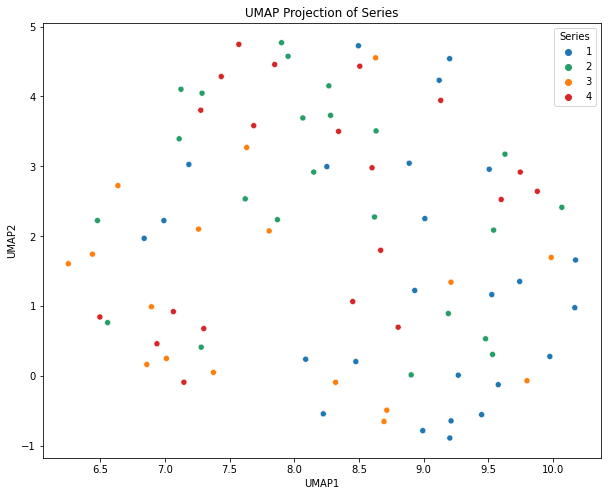

In [88]:
# Plot using seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP1', y='UMAP2', data=umap_df, hue='Series', markers=markers, 
                palette=dict(zip(umap_df['Series'].unique(), colors)))
plt.title('UMAP Projection of Series')
plt.savefig('umap_series.jpg', dpi=150, bbox_inches='tight')
plt.show()

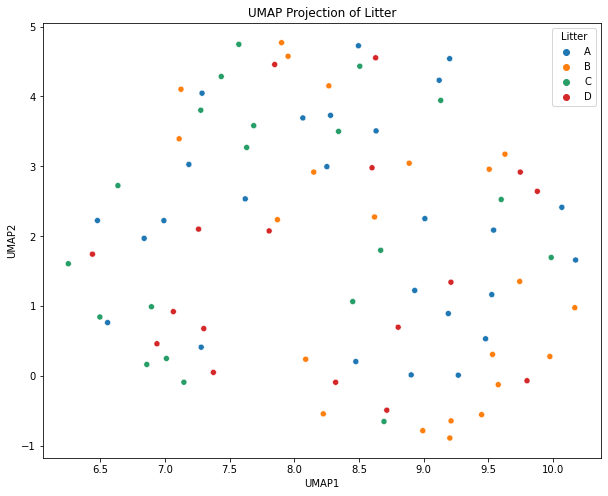

In [89]:
# Plot using seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP1', y='UMAP2', data=umap_df, hue='Litter', markers=markers, palette=dict(zip(umap_df['Litter'].unique(), colors)))
plt.title('UMAP Projection of Litter')
plt.savefig('umap_litter.jpg', dpi=150, bbox_inches='tight')
plt.show()

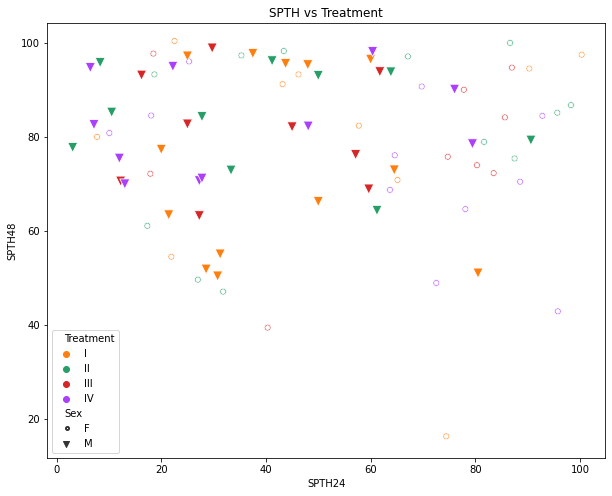

In [93]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='SPTH24', y='SPTH48', data=df, hue='Treatment', style='Sex', markers=markers, 
                palette=dict(zip(umap_df['Treatment'].unique(), colors[1:])), s=100)
plt.title('SPTH vs Treatment')
plt.savefig('spth_treatment.jpg', dpi=150, bbox_inches='tight')
plt.show()

In [ ]:
SPTH24

In [85]:
# First excel document
for tp in df['Time point'].unique():
    for treatment in df['Treatment a priori'].unique():
        for sex in df['Sex'].unique():
            plt.figure(figsize=(8, 6))
            df_sub = df[(df['Treatment a priori'] == treatment) & (df['Time point'] == tp)& (df['Sex'] == sex)]
            df_sub = df_sub.loc[:, df.columns[-8:]]
            # plotting correlation heatmap 
            dataplot = sns.heatmap(df_sub.corr(), cmap="YlGnBu", annot=True) 
            plt.title(f'{tp} - {treatment} - {sex} - datapoints: {len(df_sub)}', size = 18)

#             plt.show()
            plt.savefig(treatment + '_' + tp + '_' + sex + '.jpg', dpi=150, bbox_inches='tight')
            plt.close()   